In [65]:
# importing the required modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [66]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [67]:
# importing the dataset(i,e all the images from directory)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Arecanut_dataset/train/",
shuffle=True,
# image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 8847 files belonging to 9 classes.


In [68]:
#create a variable and assign all our image folders into it
class_names = dataset.class_names #folder name are our class name
class_names

['Healthy_Leaf',
 'Healthy_Nut',
 'Healthy_Trunk',
 'Mahali_Koleroga',
 'Stem_bleeding',
 'bud_borer',
 'healthy_foot',
 'stem cracking',
 'yellow leaf disease']

In [69]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[3 7 5 2 1 1 3 1 1 7 1 1 3 2 2 7 3 1 1 1 1 1 1 3 2 1 1 2 6 8 2 3]


In [70]:
len(dataset)

277

In [71]:
dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [72]:
#explore the dataset
#dataset.take(1) takes the first one sample
#dataset.take(10) takes the first ten sample
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) # get the first image data in tensor

#image_batch: Represents a batch of images from the dataset.
#label_batch: Corresponds to the labels associated with the images in the batch.
#The printed statement (print(image_batch[0])) outputs the data tensor of the first image in the batch

tf.Tensor(
[[[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [208.44531  201.44531  193.44531 ]
  [202.69702  197.69702  192.5564  ]
  [193.71411  189.71411  178.19067 ]]

 [[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [191.03198  185.03198  173.03198 ]
  [194.1875   187.1875   177.1875  ]
  [199.78125  192.78125  182.78125 ]]

 [[  0.         0.         0.      ]
  [  0.         0.         0.      ]
  [  0.         0.         0.      ]
  ...
  [187.15869  176.47119  164.47119 ]
  [184.       177.       161.      ]
  [196.70337  187.70337  178.70337 ]]

 ...

 [[192.       185.       176.04688 ]
  [178.5874   170.5874   157.5874  ]
  [177.88525  169.88525  156.88525 ]
  ...
  [118.148926 106.148926  94.148926]
  [140.3125   128.3125   113.      ]
  [149.37451  137.37451  122.06201 ]]

 [[182.43408  176.43408  164.43408 ]
  [178.59375  173.33862  1

In [73]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())# convert tensor into numpy
    #3D matrix array

[[[193.16406 189.16406 178.16406]
  [195.125   191.125   179.125  ]
  [195.30469 191.30469 180.30469]
  ...
  [208.82031 205.82031 196.82031]
  [206.05469 203.05469 194.05469]
  [207.      204.      195.     ]]

 [[195.25    191.25    180.25   ]
  [199.4375  195.4375  183.4375 ]
  [194.72656 190.72656 179.72656]
  ...
  [210.625   207.625   198.625  ]
  [210.      207.      198.     ]
  [208.8125  205.8125  196.8125 ]]

 [[196.11719 192.11719 181.11719]
  [199.35156 195.35156 184.35156]
  [196.9375  192.9375  181.9375 ]
  ...
  [210.0625  207.0625  200.0625 ]
  [209.      206.      199.     ]
  [209.25    206.25    197.25   ]]

 ...

 [[183.92969 179.92969 168.92969]
  [187.      185.      172.     ]
  [187.9375  185.9375  172.9375 ]
  ...
  [196.96094 192.96094 183.96094]
  [197.375   193.375   184.375  ]
  [200.69531 196.69531 187.69531]]

 [[185.49219 181.49219 169.49219]
  [184.      180.      168.     ]
  [190.      186.      174.     ]
  ...
  [198.41406 194.41406 185.41406]
  [2

In [74]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)#get the shape of the dataset

# 256, 256 is our image size and 3 is channel
CHANNELS = 3

(256, 256, 3)


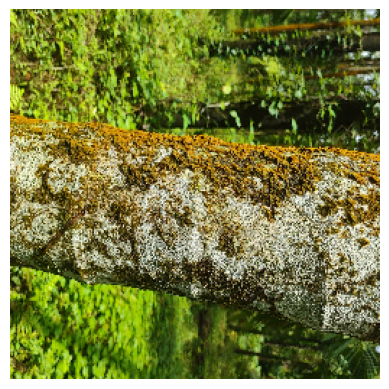

In [75]:
#visualization of data
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # plt.imshow is used to visualize the image
    #convert the image_bacth from tensor to numpy for visualzation
    # and convert it into float to int
    #randomly selecting the images
    plt.axis("off") # hide x and y-axis

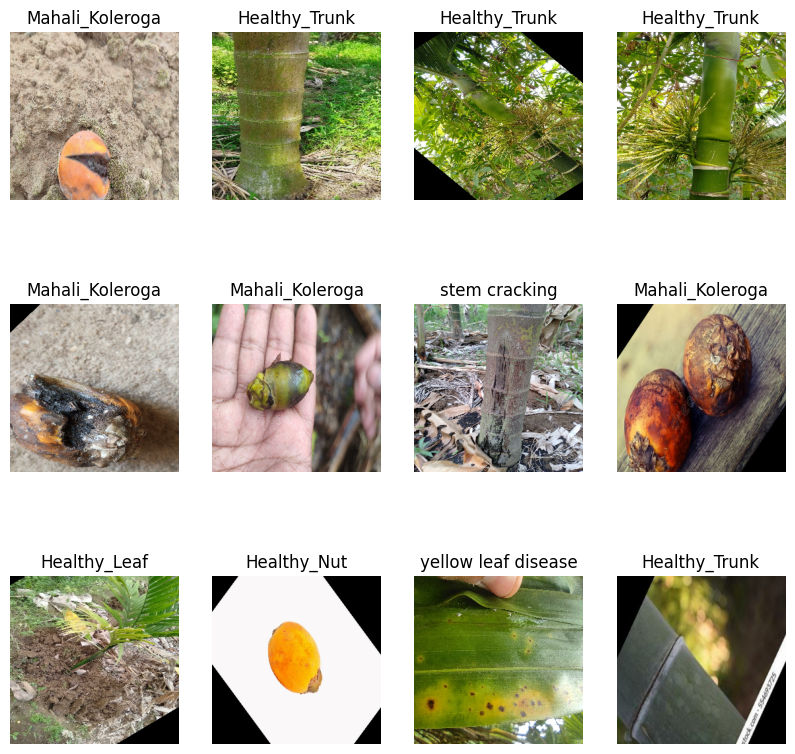

In [76]:
#visualization of data
 #increase the size of the images
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12): # displaying the 12 images
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])# assigning the title by using index no. of the dataset
        plt.axis("off") # hide x and y-axis
        


In [77]:
len(dataset)

277

In [78]:
68*32 # 32 because each data is of 32 batch

2176

In [79]:
# split the data into train and test
# 80% for training 
# 20 % for testing(in which 10 % for validation, 10% for test )
# validation is used during the training process when we run epochs

#lets try with 50 epochs
EPOCHS = 50

In [80]:
train_size = 0.8
len(dataset) * train_size


221.60000000000002

In [81]:
#dataset.take(54) takes the first 54 sample
train_ds = dataset.take(54)
len(train_ds)

54

In [82]:
test_ds = dataset.skip(54) # skipping the first 54 dataset and getting the next 54 dataset
len(test_ds)

223

In [83]:
#  10 % for validation
val_size = 0.1
len(dataset) * val_size

27.700000000000003

In [84]:
test_ds = test_ds.skip(6)
len(test_ds) #actual test dataset

217

In [85]:
# putting all the above code in a proper function
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        #randomly shuffling the datset 
        ds = ds.shuffle(shuffle_size, seed = 12) #seed is because we should not get same images, seed may be anynumber
        
        train_size = int(train_split * ds_size) #convert into integer
        val_size = int(val_split *  ds_size)
        
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size) # first skip and then take the dataset
        test_ds = ds.skip(train_size).take(val_size)
        
        return train_ds, val_ds, test_ds
        

In [86]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)
len(train_ds)


221

In [87]:
len(val_ds)

27

In [88]:
len(test_ds)

27

In [89]:
# train dataset = train_ds
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
# prefetch will load next batch of the images, when current batch is bussy

#validation dataset = val_ds
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
#test dataset = test_ds
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory


In [90]:
#resizing and rescaling the images
resizing_and_rescaling = tf.keras.Sequential([
    #resizing and rescaling each image layer
    # .experimental is an API
    
    # layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [91]:
data_augumentation =  tf.keras.Sequential([
    # concert the image into horizontal and vertical (landsacpe and portrait )
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [92]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [93]:
#Model Building CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9 # our no. of classes(folders) are three

model = models.Sequential([
    resizing_and_rescaling, # first resizing_and_rescaling
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
     # trial and error with neurons 32 and 64
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
     #after pooling we should do flatten the model
    layers.Flatten(),
    
      #adding dense layer of 64 neurons
    layers.Dense(64, activation='relu'),
    
    #     normalize the classes
    # softmax normalize the probability of the classes
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (32, 30, 30, 64)         

In [95]:
from keras import utils as np_utils

In [96]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [97]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)
# here we get the validation accuracy and accuracy of the model at each train
# accuracy will be keep on increasing as we train

Epoch 1/50
221/221 [==============================] - 608s 2s/step - loss: 1.1944 - accuracy: 0.5415 - val_loss: 0.8897 - val_accuracy: 0.6736
Epoch 2/50
221/221 [==============================] - 499s 2s/step - loss: 0.7618 - accuracy: 0.7159 - val_loss: 0.6001 - val_accuracy: 0.7801
Epoch 3/50
221/221 [==============================] - 531s 2s/step - loss: 0.5801 - accuracy: 0.7932 - val_loss: 0.4935 - val_accuracy: 0.8194
Epoch 4/50
221/221 [==============================] - 542s 2s/step - loss: 0.4824 - accuracy: 0.8234 - val_loss: 0.3948 - val_accuracy: 0.8553
Epoch 5/50
221/221 [==============================] - 521s 2s/step - loss: 0.3643 - accuracy: 0.8724 - val_loss: 0.2387 - val_accuracy: 0.9236
Epoch 6/50
221/221 [==============================] - 504s 2s/step - loss: 0.3161 - accuracy: 0.8886 - val_loss: 0.2289 - val_accuracy: 0.9120
Epoch 7/50
221/221 [==============================] - 504s 2s/step - loss: 0.2598 - accuracy: 0.9067 - val_loss: 0.3078 - val_accuracy: 0.8889

In [98]:
#  model compling using optimizer, loss and metrics
# model.compile(
#     optimizer = 'adam',
#      loss = tf.keras.utils.np_utils.to_categorical(from_logits = False),
#     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics = ['accuracy']
# )

In [99]:
# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

In [100]:
score = model.evaluate(test_ds)
score

27/27 [==============================] - 115s 397ms/step - loss: 0.0129 - accuracy: 0.9965


[0.012886153534054756, 0.9965277910232544]

In [101]:
history

In [102]:
history.params # parameters

{'verbose': 1, 'epochs': 50, 'steps': 221}

In [103]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [104]:
history.history['accuracy']

[0.5414599776268005,
 0.7159461379051208,
 0.7931963205337524,
 0.8233876824378967,
 0.8724309206008911,
 0.8885896801948547,
 0.9067327976226807,
 0.9339475631713867,
 0.9394755363464355,
 0.9479801654815674,
 0.9455705285072327,
 0.9712260961532593,
 0.9733522534370422,
 0.9678242206573486,
 0.9729269742965698,
 0.9784550070762634,
 0.9639971852302551,
 0.9858256578445435,
 0.9763288497924805,
 0.9781715273857117,
 0.9873848557472229,
 0.9819985628128052,
 0.987243115901947,
 0.9852586984634399,
 0.9767540693283081,
 0.9856839179992676,
 0.990503191947937,
 0.9878100752830505,
 0.9805811643600464,
 0.9948972463607788,
 0.9791637063026428,
 0.9909284114837646,
 0.9917788505554199,
 0.9829908013343811,
 0.9919206500053406,
 0.9839829802513123,
 0.99588942527771,
 0.9998582601547241,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [105]:
len(history.history['accuracy'])

50

In [106]:
# visualize the train and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

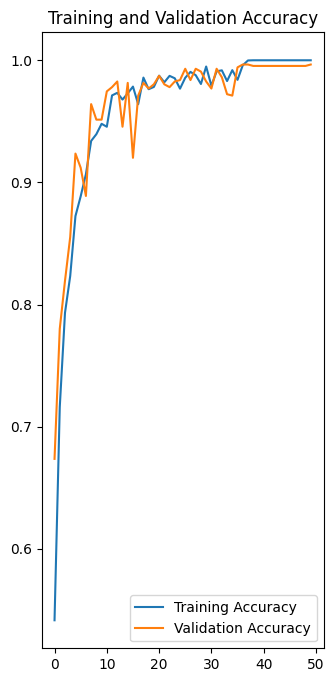

In [107]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#graphs shows the increase in accuracy

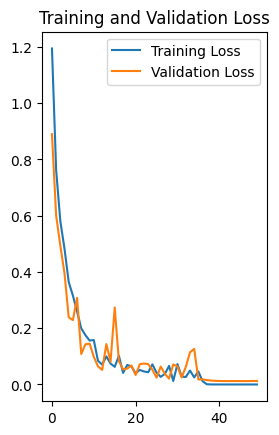

In [108]:
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# graphs shows the loss

first image to predict
actual label: Healthy_Trunk
predicted label: Healthy_Trunk


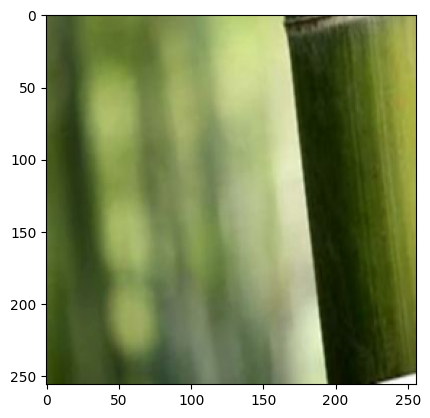

In [109]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [110]:
# function which takes model and image as input and tells predict class and confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

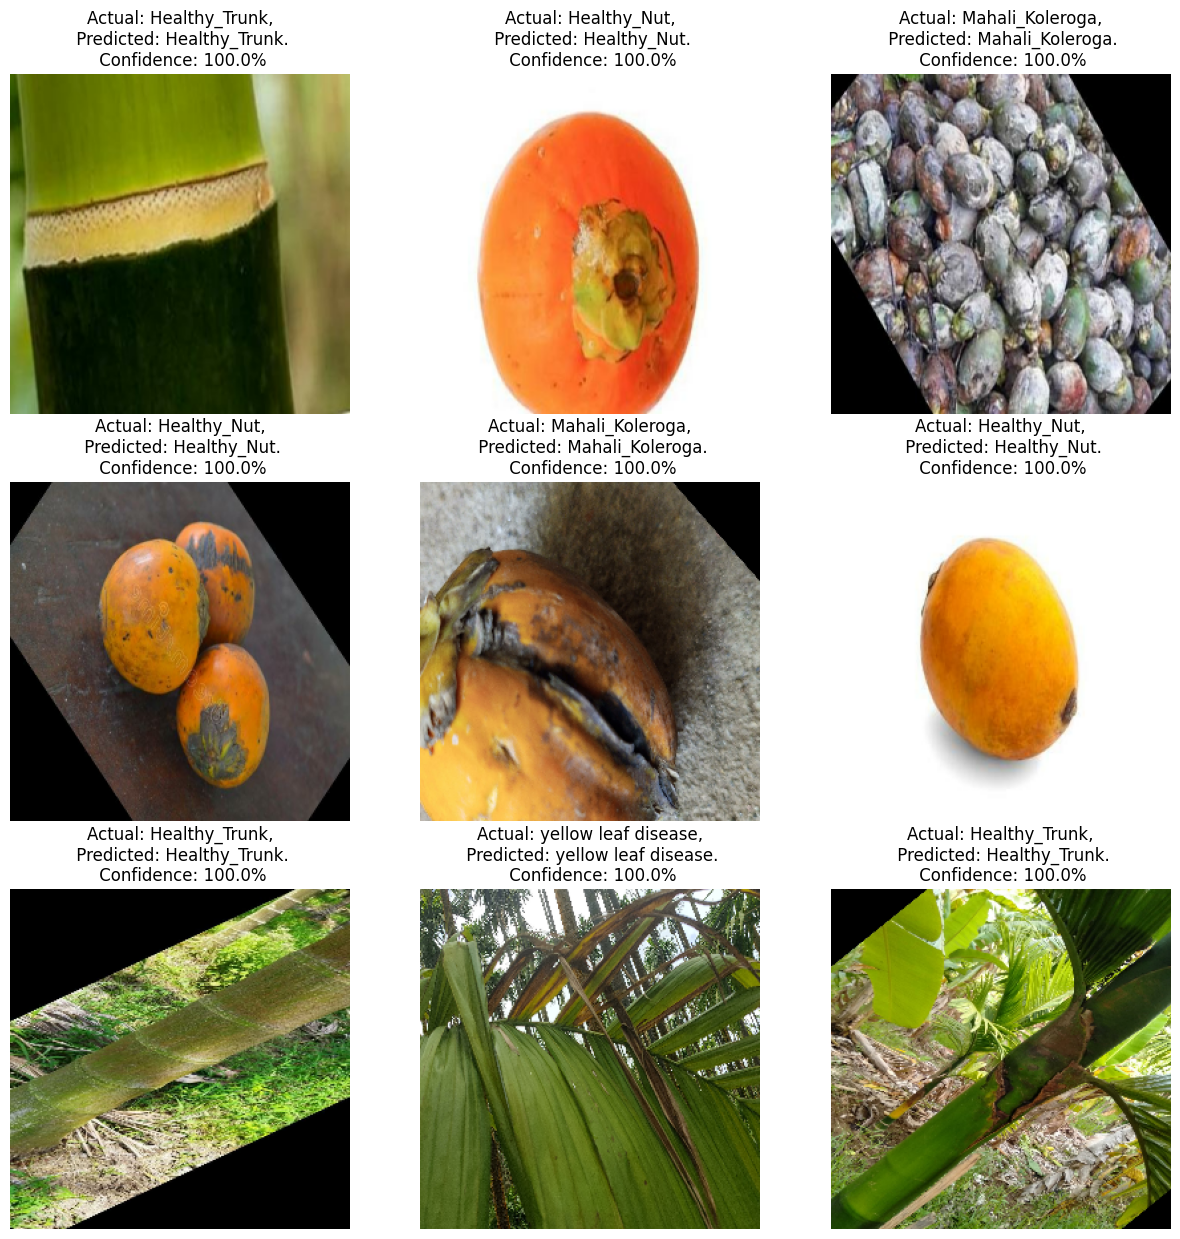

In [111]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
# save the model
import os
# automatically create the version of the model
model_version=max([int(i) for i in os.listdir(r"C:\Users\Admin\Desktop") if i.isdigit()] + [0])+1
model.save(f"../models/{model_version}")

NameError: name 'model' is not defined

In [ ]:
import os
os.chdir(r'C:\Users\Admin\Desktop\potato-disease-classification-main\training\models')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Admin\\Desktop\\potato-disease-classification-main\\training\\models'

In [ ]:
model.save("../arecanut.h5")